In [37]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [32]:
# Generate some points
nrows = 400;
ncols = 600;

obstacle = np.zeros((nrows, ncols));
[x, y] = np.meshgrid (np.arange(ncols), np.arange(nrows));

In [35]:
# Generate some obstacle
obstacle [300:, 100:250] = True;
obstacle [150:200, 400:500] = True;

t = ((x - 200)**2 + (y - 50)**2) < 50**2;
obstacle[t] = True;

t = ((x - 400)**2 + (y - 300)**2) < 100**2;
obstacle[t] = True;

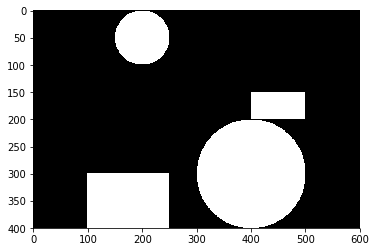

In [39]:
plt.imshow(obstacle, 'gray')

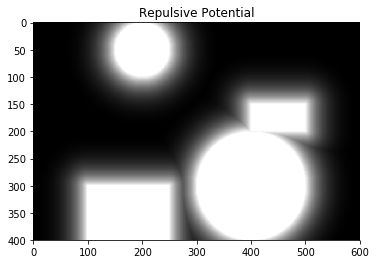

In [48]:
# Compute distance transform
from scipy.ndimage.morphology import distance_transform_edt as bwdist

d = bwdist(obstacle==0);

# Rescale and transform distances

d2 = (d/100.) + 1;

d0 = 2;
nu = 800;

repulsive = nu*((1./d2 - 1/d0)**2);

repulsive [d2 > d0] = 0;

# Display repulsive potential
plt.imshow(repulsive, 'gray')
plt.title ('Repulsive Potential');

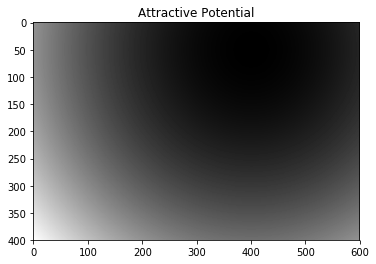

In [190]:
# Compute attractive force
goal = [400, 50];

xi = 1/700.;

attractive = xi * ( (x - goal[0])**2 + (y - goal[1])**2 );

# Display attractive potential
plt.imshow(attractive, 'gray')
plt.title ('Attractive Potential');

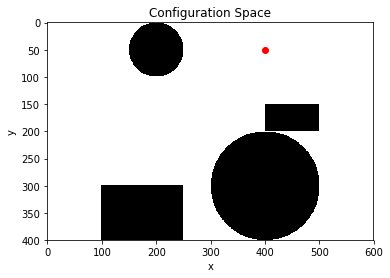

In [64]:
# Display 2D configuration space
plt.imshow(1-obstacle, 'gray');
plt.plot (goal[0], goal[1], 'ro');

# plt.axis ([0, ncols, 0, nrows]);

plt.xlabel ('x');
plt.ylabel ('y');

plt.title ('Configuration Space');

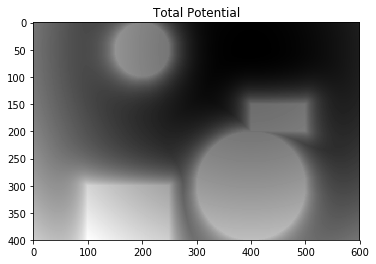

In [213]:
# Combine terms

f = attractive + repulsive;
plt.imshow(f, 'gray')
plt.title ('Total Potential');

In [202]:
def GradientBasedPlanner (f, start_coords, end_coords, max_its):
    # GradientBasedPlanner : This function plans a path through a 2D
    # environment from a start to a destination based on the gradient of the
    # function f which is passed in as a 2D array. The two arguments
    # start_coords and end_coords denote the coordinates of the start and end
    # positions respectively in the array while max_its indicates an upper
    # bound on the number of iterations that the system can use before giving
    # up.
    # The output, route, is an array with 2 columns and n rows where the rows
    # correspond to the coordinates of the robot as it moves along the route.
    # The first column corresponds to the x coordinate and the second to the y coordinate

    [gy, gx] = np.gradient(-f);

    route = np.vstack( [np.array(start_coords), np.array(start_coords)] )
    for i in range(max_its):
        current_point = route[-1,:];
#         print(sum( abs(current_point-end_coords) ))
        if sum( abs(current_point-end_coords) ) < 5.0:
            print('Reached the goal !');
            break
        ix = int(round( current_point[1] ));
        iy = int(round( current_point[0] ));
        vx = gx[ix, iy]
        vy = gy[ix, iy]
        dt = 1 / np.linalg.norm([vx, vy]);
        next_point = current_point + dt*np.array( [vx, vy] );
        route = np.vstack( [route, next_point] );
    route = route[1:,:]
        
    return route

In [205]:
# Plan route
start = [50, 350]; # goal = [400, 50];

route = GradientBasedPlanner(f, start, goal, 700);

Reached the goal !


In [188]:
def gradient_plot(x,y, gx,gy, skip=10):
    plt.figure(figsize=(12,8))
    Q = plt.quiver(x[::skip, ::skip], y[::skip, ::skip], gx[::skip, ::skip], gy[::skip, ::skip],
                   pivot='mid', units='inches')
    qk = plt.quiverkey(Q, 0.9, 0.9, 1, r'$1 \frac{m}{s}$', labelpos='E',
                       coordinates='figure')
    plt.scatter(x[::skip, ::skip], y[::skip, ::skip], color='r', s=5)

In [209]:
[gx, gy] = np.gradient(-f);

Text(0.5, 1.0, 'Gx=df/dx - gradient')

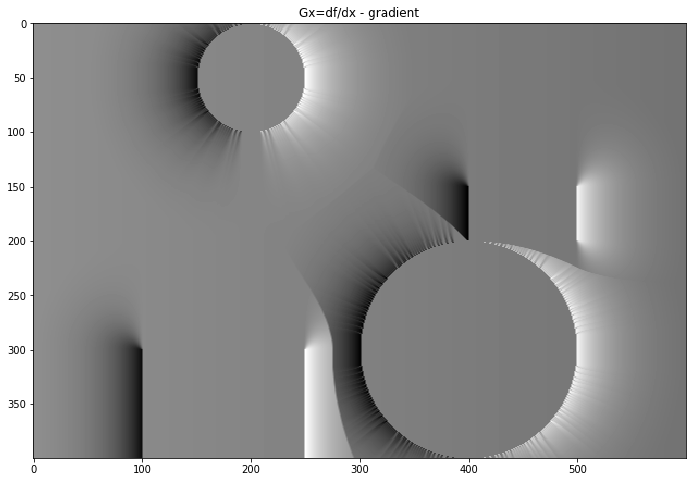

In [210]:
plt.figure(figsize=(12,8))
plt.imshow(gy, 'gray')
plt.title('Gx=df/dx - gradient')

Text(0.5, 1.0, 'Gy=df/dy - gradient')

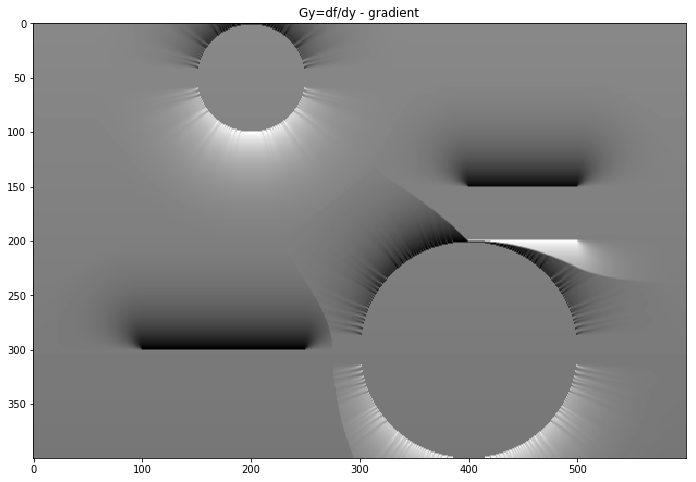

In [211]:
plt.figure(figsize=(12,8))
plt.imshow(gx, 'gray')
plt.title('Gy=df/dy - gradient')

Text(0, 0.5, 'Y')

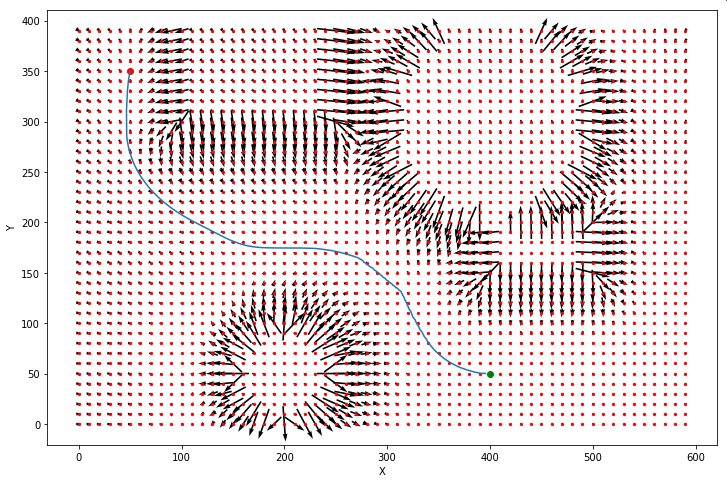

In [212]:
# Velocities plot
skip = 10;

xidx = np.arange(0,ncols,skip)
yidx = np.arange(0,nrows,skip)

gradient_plot(x,y, gy,gx, skip=10)

plt.plot(start[0], start[1], 'ro');
plt.plot(goal[0], goal[1], 'ro', color='green');
plt.plot(route[:,0], route[:,1]);
plt.xlabel('X')
plt.ylabel('Y')